In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
from spatialist import Raster, Vector
from spatialist.explorer import RasterViewer

### A small time series plotting example
Along with this package we provide a small data Sentinel-1 SAR data set acquired in Interferometric (IW) Ground Range Detected (GRD) mode. It shows a small area in the Camargue, Southern France.  
This data set contains all images acquired in the area from January 1st 2017 to December 31st 2017, a total of 160 time steps.  
Currently we are developing a time series visualization tool based on matplotlib. Here you can test its capabilities live..

In [2]:
dataset = 'tutorial_data/S1_GRD_VV_France_Camargue_2017-01-01_2017-12-31'

In [3]:
with Raster(dataset) as ras:
    print(ras)

class      : spatialist Raster object
dimensions : 100, 100, 160 (rows, cols, bands)
resolution : 20.0, -20.0 (x, y)
extent     : 603068.241, 605068.241, 4818654.701, 4820654.701 (xmin, xmax, ymin, ymax)
coord. ref.: +proj=utm +zone=31 +datum=WGS84 +units=m +no_defs 
data source: /home/john/PycharmProjects/spatialist/tutorial_data/S1_GRD_VV_France_Camargue_2017-01-01_2017-12-31


<IPython.core.display.Javascript object>


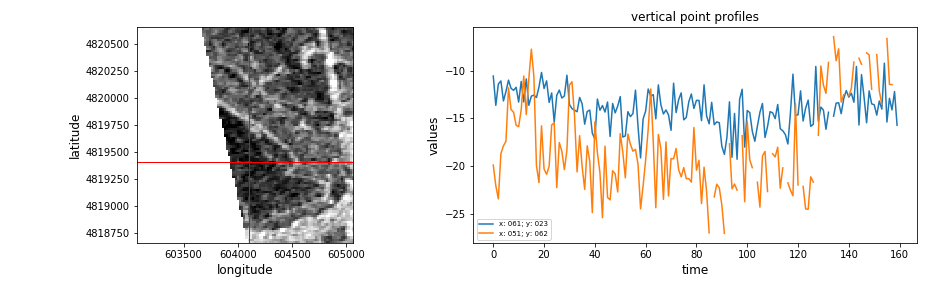

In [4]:
%matplotlib notebook
view = RasterViewer(dataset, cmap='gray', pmin=1, pmax=99)

### subsetting a raster object
In the following examples we want to subset our Raster data using pixel indices as well as vector data from a shapefile.  
first we display band 1 of the whole data set:

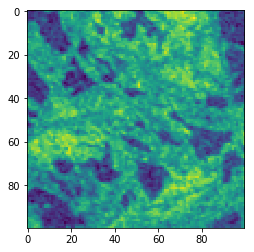

In [5]:
% matplotlib inline
with Raster(dataset) as ras:
    plt.imshow(ras.matrix(1))
    plt.show()

next we display a subset of this band:

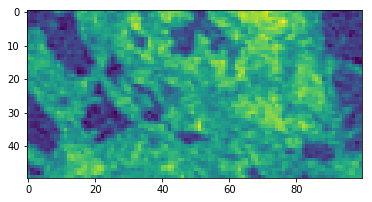

In [6]:
with Raster(dataset)[0:50,:,0] as ras:
    plt.imshow(ras.matrix())
    plt.show()

now we take a shapefile that is provided with this tutorial, subset the raster data with it and again display one of the layers. In this step, the Raster object is first subsetted to the extent of the vector bounding box and then all areas not overlapping with the shapefile geometries are masked.

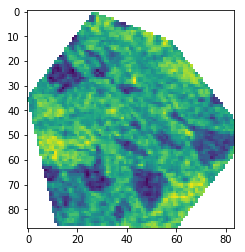

In [7]:
shapefile = 'tutorial_data/subset.shp'
with Raster(dataset) as ras:
    with Vector(shapefile) as vec:
        with ras[vec] as sub:
            plt.imshow(sub.matrix(band=1))
            plt.show()